In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
from tqdm import tqdm
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#reading the csv files
train_data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/FINAL_TRAINING_DATA_NAN_ENCODING.csv',sep=";")
test_data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/FINAL_TEST_DATA_NAN_ENCODING.csv',sep=";")

In [ ]:
#Extracting the train and test data
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1.0: 32660, 0.0: 151})
Counter({1.0: 3621, 0.0: 25})


Oversampling using SMOTE
* as the data is highly imbalanced.




In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({1.0: 32660, 0.0: 32660})
The number of classes after fit Counter({1.0: 32660, 0.0: 32660})


Breaking Train Data into 
* TRAIN DATA
* CROSS VALIDATION DATA

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

# 1. TRAINING DIFFERENT MODELS

In [ ]:
#Code for printing the confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

## 1.1 Logistic Regression

### 1.1.1 Performing Grid Search CV for hyperparameter tuning

In [ ]:
# define models and parameters
model = LogisticRegression(max_iter = 10000,n_jobs=-1,verbose = 3)
c_values = [0.00000000000001,0.000000000001,0.0000000001,0.00000001,0.000001,0.0001,0.01,1]

# define grid search
grid = dict(C=c_values)
clf = GridSearchCV(estimator=model, param_grid=grid, verbose = 3, cv=5, scoring='roc_auc',error_score=0,return_train_score=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END .......C=1e-14;, score=(train=0.495, test=0.493) total time=   1.0s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END .......C=1e-14;, score=(train=0.492, test=0.501) total time=   0.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END .......C=1e-14;, score=(train=0.494, test=0.495) total time=   0.3s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END .......C=1e-14;, score=(train=0.496, test=0.484) total time=   0.3s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END .......C=1e-14;, score=(train=0.493, test=0.496) total time=   0.3s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END .......C=1e-12;, score=(train=0.647, test=0.648) total time=   0.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END .......C=1e-12;, score=(train=0.643, test=0.649) total time=   0.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END .......C=1e-12;, score=(train=0.647, test=0.645) total time=   0.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END .......C=1e-12;, score=(train=0.631, test=0.623) total time=   0.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END .......C=1e-12;, score=(train=0.636, test=0.639) total time=   0.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END .......C=1e-10;, score=(train=0.910, test=0.914) total time=   0.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END .......C=1e-10;, score=(train=0.910, test=0.913) total time=   0.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END .......C=1e-10;, score=(train=0.910, test=0.907) total time=   0.7s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END .......C=1e-10;, score=(train=0.911, test=0.906) total time=   0.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END .......C=1e-10;, score=(train=0.908, test=0.909) total time=   0.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END .......C=1e-08;, score=(train=0.910, test=0.915) total time=   0.9s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END .......C=1e-08;, score=(train=0.910, test=0.913) total time=   0.8s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END .......C=1e-08;, score=(train=0.911, test=0.908) total time=   0.8s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END .......C=1e-08;, score=(train=0.911, test=0.906) total time=   0.8s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END .......C=1e-08;, score=(train=0.911, test=0.912) total time=   0.9s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END .......C=1e-06;, score=(train=0.903, test=0.904) total time=   1.3s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END .......C=1e-06;, score=(train=0.899, test=0.895) total time=   1.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END .......C=1e-06;, score=(train=0.912, test=0.916) total time=   1.7s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END .......C=1e-06;, score=(train=0.911, test=0.912) total time=   1.9s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END .......C=1e-06;, score=(train=0.913, test=0.909) total time=   2.2s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END ......C=0.0001;, score=(train=0.997, test=0.997) total time=   5.9s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END ......C=0.0001;, score=(train=0.997, test=0.997) total time=   4.7s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END ......C=0.0001;, score=(train=0.998, test=0.998) total time=   6.0s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END ......C=0.0001;, score=(train=0.983, test=0.984) total time=   3.4s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END ......C=0.0001;, score=(train=0.997, test=0.998) total time=   5.7s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   6.0s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=  11.1s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   5.1s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   7.8s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   6.0s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5] END ...........C=1;, score=(train=1.000, test=1.000) total time=  10.3s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5] END ...........C=1;, score=(train=1.000, test=1.000) total time=  14.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5] END ...........C=1;, score=(train=1.000, test=1.000) total time=   8.7s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5] END ...........C=1;, score=(train=1.000, test=1.000) total time=  11.2s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5] END ...........C=1;, score=(train=1.000, test=1.000) total time=   7.9s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score=0,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1, verbose=3),
             param_grid={'C': [1e-14, 1e-12, 1e-10, 1e-08, 1e-06, 0.0001, 0.01,
                               1]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [ ]:

results = pd.DataFrame.from_dict(clf.cv_results_)
log_c=[]
for a in tqdm(c_values):    
  log_a = math.log(a)    
  log_c.append(log_a)

100%|██████████| 8/8 [00:00<00:00, 65793.00it/s]


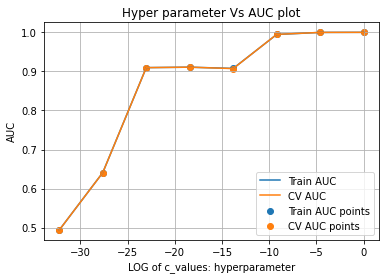

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.498145,0.282220,0.012458,0.001181,0.0,{'C': 1e-14},0.493464,0.501380,0.494662,0.483918,...,0.493895,0.005674,8,0.494552,0.492287,0.494129,0.495502,0.493049,0.493904,0.001129
1,0.473667,0.020001,0.011170,0.000529,0.0,{'C': 1e-12},0.648404,0.649002,0.644544,0.623139,...,0.640783,0.009538,7,0.646727,0.643473,0.646676,0.631042,0.636423,0.640868,0.006183
2,0.629013,0.036261,0.012449,0.001900,0.0,{'C': 1e-10},0.913946,0.912940,0.906734,0.905838,...,0.909631,0.003262,5,0.909595,0.909891,0.910454,0.910568,0.907838,0.909669,0.000983
3,0.842081,0.057123,0.011926,0.001936,0.0,{'C': 1e-08},0.914520,0.913422,0.907616,0.906392,...,0.910786,0.003215,4,0.910324,0.910424,0.911060,0.911232,0.910837,0.910776,0.000352
4,1.695732,0.324417,0.014044,0.006886,0.000001,{'C': 1e-06},0.903676,0.895377,0.915762,0.911760,...,0.907191,0.007086,6,0.903090,0.899415,0.911882,0.911241,0.912528,0.907631,0.005352


In [ ]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']

cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']


plt.plot(log_c, train_auc, label='Train AUC')
plt.plot(log_c, cv_auc, label='CV AUC')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("LOG of c_values: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

Observations:
* Using C = 0.0001, we get a pretty good result, thus we use C = 0.0001 for training our Logisitic Regression Model
* Using C = 0.01 and C = 0.1, the performance of the model does not improve much, so we are not considering these values for C
* With the default value for max_iteration, the model was not able to converge, used max_iter = 1000

### 1.1.2 Training the Logistic Regression Models using best hyperparameters

In [ ]:
clf = LogisticRegression(max_iter = 10000,n_jobs=-1,verbose = 3,C = 0.0001)
clf.fit(X_train,y_train)
y_cv_pred = clf.predict(X_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


### 1.1.3 Feature Importance using Logistic Regression



In [ ]:
# get importance
feat_imp = {}
importance = clf.coef_
# summarize feature importance
for i,v in enumerate(importance[0]):
	feat_imp[X_train.columns[i]] = v
	print('%s, Score: %.5f' % (X_train.columns[i],v))

CODE_GENDER, Score: 0.02521
FLAG_OWN_CAR, Score: 0.03442
FLAG_OWN_REALTY, Score: 0.04370
CNT_CHILDREN, Score: 0.01003
AMT_INCOME_TOTAL, Score: 0.00001
AGE, Score: -0.02130
FLAG_MOBIL, Score: 0.02396
FLAG_WORK_PHONE, Score: 0.02011
FLAG_PHONE, Score: 0.02188
FLAG_EMAIL, Score: 0.00925
CNT_FAM_MEMBERS, Score: 0.00635
YEARS_EMPLOYED, Score: 0.00104
Bad_Debt, Score: -0.76367
Good_Debt, Score: 0.04009
Neutral_Debt, Score: -0.11944
NAME_INCOME_TYPE_Commercial associate, Score: 0.01990
NAME_INCOME_TYPE_Pensioner, Score: 0.01618
NAME_INCOME_TYPE_State servant, Score: 0.00974
NAME_INCOME_TYPE_Student, Score: 0.00004
NAME_INCOME_TYPE_Working, Score: 0.03960
NAME_EDUCATION_TYPE_Academic degree, Score: 0.00008
NAME_EDUCATION_TYPE_Higher education, Score: 0.02518
NAME_EDUCATION_TYPE_Incomplete higher, Score: 0.00442
NAME_EDUCATION_TYPE_Lower secondary, Score: 0.00122
NAME_EDUCATION_TYPE_Secondary / secondary special, Score: 0.03224
NAME_FAMILY_STATUS_Civil marriage, Score: 0.00965
NAME_FAMILY_STATU

### 1.1.4 Confusion Matrix and other Metrics for Cross Validation Data

True positive =  7370
False positive =  724
False negative =  70
True negative =  8166
ACCURACY SCORE--> 0.9513778322106552
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      8094
         1.0       0.92      0.99      0.95      8236

    accuracy                           0.95     16330
   macro avg       0.95      0.95      0.95     16330
weighted avg       0.95      0.95      0.95     16330



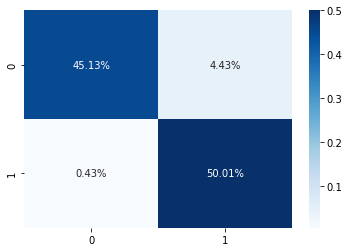

In [ ]:
cm = confusion_matrix(y_cv, y_cv_pred)
print_confusion_matrix(y_cv,y_cv_pred)
print("ACCURACY SCORE-->",accuracy_score(y_cv, y_cv_pred))
sn.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print(classification_report(y_cv,y_cv_pred))

## 1.2 Decision Tree

### 1.2.1 Performing Grid Search CV for hyperparameter tuning

In [ ]:
# define models and parameters
model = DecisionTreeClassifier()
max_depth = [1,2,5,10,20,30]

# define grid search
grid = dict(max_depth=max_depth)
clf = GridSearchCV(estimator=model, param_grid=grid, verbose = 3, cv=5, scoring='roc_auc',error_score=0,return_train_score=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...max_depth=1;, score=(train=0.998, test=0.998) total time=   0.1s
[CV 2/5] END ...max_depth=1;, score=(train=0.998, test=0.998) total time=   0.1s
[CV 3/5] END ...max_depth=1;, score=(train=0.998, test=0.998) total time=   0.1s
[CV 4/5] END ...max_depth=1;, score=(train=0.998, test=0.998) total time=   0.1s
[CV 5/5] END ...max_depth=1;, score=(train=0.998, test=0.999) total time=   0.1s
[CV 1/5] END ...max_depth=2;, score=(train=0.998, test=0.999) total time=   0.1s
[CV 2/5] END ...max_depth=2;, score=(train=0.999, test=0.998) total time=   0.1s
[CV 3/5] END ...max_depth=2;, score=(train=0.998, test=0.998) total time=   0.1s
[CV 4/5] END ...max_depth=2;, score=(train=0.998, test=0.999) total time=   0.1s
[CV 5/5] END ...max_depth=2;, score=(train=0.998, test=0.999) total time=   0.1s
[CV 1/5] END ...max_depth=5;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 2/5] END ...max_depth=5;, score=(train=0.999,

GridSearchCV(cv=5, error_score=0, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30]},
             return_train_score=True, scoring='roc_auc', verbose=3)

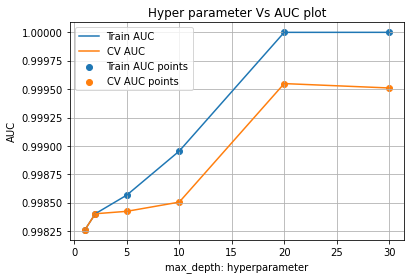

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049671,0.001489,0.008572,0.000435,1,{'max_depth': 1},0.998260,0.997748,0.998158,0.998465,...,0.998260,0.000310,6,0.998260,0.998388,0.998285,0.998209,0.998158,0.998260,7.761785e-05
1,0.069949,0.004301,0.009003,0.000356,2,{'max_depth': 2},0.998566,0.997851,0.998260,0.998669,...,0.998403,0.000314,5,0.998362,0.998541,0.998439,0.998336,0.998337,0.998403,7.859740e-05
2,0.115684,0.004827,0.009586,0.001570,5,{'max_depth': 5},0.998567,0.997954,0.998158,0.998874,...,0.998424,0.000327,4,0.998567,0.998670,0.998644,0.998465,0.998490,0.998567,8.091080e-05
3,0.184377,0.003645,0.009044,0.000168,10,{'max_depth': 10},0.998561,0.998166,0.998150,0.998974,...,0.998505,0.000314,3,0.998818,0.998955,0.999224,0.998975,0.998802,0.998955,1.515257e-04
4,0.293458,0.021972,0.009211,0.000243,20,{'max_depth': 20},0.999480,0.999489,0.999286,0.999795,...,0.999549,0.000179,1,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,3.384118e-07


In [ ]:
import math
results = pd.DataFrame.from_dict(clf.cv_results_)


train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']


plt.plot(max_depth, train_auc, label='Train AUC')
plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

### 1.2.2 Training the Decision Tree using best hyperparameters

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train,y_train)
y_cv_pred = clf.predict(X_cv)

### 1.2.3 Feature Importance using Decision Tree

In [ ]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('%s, Score: %.5f' % (X_train.columns[i],v))

CODE_GENDER, Score: 0.00000
FLAG_OWN_CAR, Score: 0.00000
FLAG_OWN_REALTY, Score: 0.00000
CNT_CHILDREN, Score: 0.00000
AMT_INCOME_TOTAL, Score: 0.00000
AGE, Score: 0.00000
FLAG_MOBIL, Score: 0.00000
FLAG_WORK_PHONE, Score: 0.00000
FLAG_PHONE, Score: 0.00000
FLAG_EMAIL, Score: 0.00000
CNT_FAM_MEMBERS, Score: 0.00000
YEARS_EMPLOYED, Score: 0.00000
Bad_Debt, Score: 0.99956
Good_Debt, Score: 0.00000
Neutral_Debt, Score: 0.00000
NAME_INCOME_TYPE_Commercial associate, Score: 0.00000
NAME_INCOME_TYPE_Pensioner, Score: 0.00000
NAME_INCOME_TYPE_State servant, Score: 0.00000
NAME_INCOME_TYPE_Student, Score: 0.00000
NAME_INCOME_TYPE_Working, Score: 0.00000
NAME_EDUCATION_TYPE_Academic degree, Score: 0.00000
NAME_EDUCATION_TYPE_Higher education, Score: 0.00000
NAME_EDUCATION_TYPE_Incomplete higher, Score: 0.00000
NAME_EDUCATION_TYPE_Lower secondary, Score: 0.00000
NAME_EDUCATION_TYPE_Secondary / secondary special, Score: 0.00000
NAME_FAMILY_STATUS_Civil marriage, Score: 0.00000
NAME_FAMILY_STATUS_M

### 1.2.4 Confusion Matrix and other Metrics for Cross Validation Data

True positive =  8088
False positive =  6
False negative =  27
True negative =  8209
ACCURACY SCORE--> 0.9979791794243723
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8094
         1.0       1.00      1.00      1.00      8236

    accuracy                           1.00     16330
   macro avg       1.00      1.00      1.00     16330
weighted avg       1.00      1.00      1.00     16330



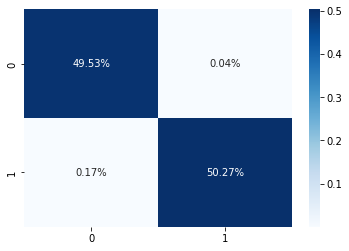

In [ ]:
cm = confusion_matrix(y_cv, y_cv_pred)
print_confusion_matrix(y_cv,y_cv_pred)
print("ACCURACY SCORE-->",accuracy_score(y_cv, y_cv_pred))
sn.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print(classification_report(y_cv,y_cv_pred))

## 1.3 Random Forest

### 1.3.1 Performing Grid Search CV for hyperparameter tuning

In [ ]:
# define models and parameters
model = RandomForestClassifier(random_state = 7)
n_estimators = [1,2,3,4,5,10,20,50]

# define grid search
grid = dict(n_estimators=n_estimators)
clf = GridSearchCV(estimator=model, param_grid=grid, verbose = 3, cv=5, scoring='roc_auc',error_score=0,return_train_score=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_estimators=1;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/5] END n_estimators=1;, score=(train=1.000, test=0.998) total time=   0.1s
[CV 3/5] END n_estimators=1;, score=(train=0.999, test=0.998) total time=   0.1s
[CV 4/5] END n_estimators=1;, score=(train=0.999, test=0.998) total time=   0.1s
[CV 5/5] END n_estimators=1;, score=(train=0.999, test=0.998) total time=   0.1s
[CV 1/5] END n_estimators=2;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END n_estimators=2;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/5] END n_estimators=2;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 4/5] END n_estimators=2;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END n_estimators=2;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END n_estimators=3;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END n_estimators=3;, score=(train=1.000,

GridSearchCV(cv=5, error_score=0,
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 10, 20, 50]},
             return_train_score=True, scoring='roc_auc', verbose=3)

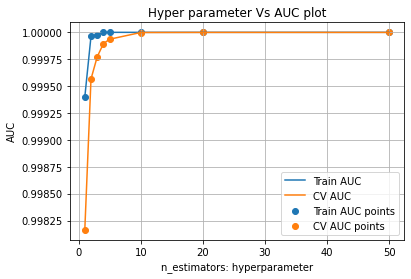

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048935,0.001877,0.009475,0.000244,1,{'n_estimators': 1},0.998775,0.998063,0.997548,0.998467,...,0.998163,0.000423,8,0.999566,0.999515,0.999438,0.999081,0.999387,0.999397,1.698365e-04
1,0.071169,0.005559,0.010528,0.000301,2,{'n_estimators': 2},0.999587,0.999484,0.999280,0.999587,...,0.999566,0.000198,7,0.999897,1.000000,1.000000,0.999948,0.999974,0.999964,3.838671e-05
2,0.100861,0.006796,0.011710,0.000587,3,{'n_estimators': 3},0.999895,0.999792,0.999383,0.999794,...,0.999773,0.000209,6,0.999923,1.000000,1.000000,0.999974,1.000000,0.999979,2.985519e-05
3,0.131148,0.008178,0.013441,0.001362,4,{'n_estimators': 4},0.999998,0.999997,0.999687,0.999794,...,0.999895,0.000131,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.161263e-08
4,0.154191,0.015436,0.014397,0.000731,5,{'n_estimators': 5},0.999998,0.999995,0.999893,0.999794,...,0.999936,0.000082,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.497393e-08


In [ ]:
import math
results = pd.DataFrame.from_dict(clf.cv_results_)



train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']


plt.plot(n_estimators, train_auc, label='Train AUC')
plt.plot(n_estimators, cv_auc, label='CV AUC')

plt.scatter(n_estimators, train_auc, label='Train AUC points')
plt.scatter(n_estimators, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

### 1.3.2 Training the Random Forest using best hyperparameters

In [ ]:
clf = RandomForestClassifier(n_estimators = 2,random_state = 7)
clf.fit(X_train,y_train)
y_cv_pred = clf.predict(X_cv)

### 1.3.3 Feature Importance using Random Forest

In [ ]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('%s, Score: %.5f' % (X_train.columns[i],v))

CODE_GENDER, Score: 0.00221
FLAG_OWN_CAR, Score: 0.00180
FLAG_OWN_REALTY, Score: 0.00724
CNT_CHILDREN, Score: 0.02638
AMT_INCOME_TOTAL, Score: 0.00753
AGE, Score: 0.00543
FLAG_MOBIL, Score: 0.00000
FLAG_WORK_PHONE, Score: 0.00142
FLAG_PHONE, Score: 0.00031
FLAG_EMAIL, Score: 0.00033
CNT_FAM_MEMBERS, Score: 0.00582
YEARS_EMPLOYED, Score: 0.00433
Bad_Debt, Score: 0.77612
Good_Debt, Score: 0.00333
Neutral_Debt, Score: 0.02974
NAME_INCOME_TYPE_Commercial associate, Score: 0.00005
NAME_INCOME_TYPE_Pensioner, Score: 0.00021
NAME_INCOME_TYPE_State servant, Score: 0.00103
NAME_INCOME_TYPE_Student, Score: 0.00000
NAME_INCOME_TYPE_Working, Score: 0.00466
NAME_EDUCATION_TYPE_Academic degree, Score: 0.00000
NAME_EDUCATION_TYPE_Higher education, Score: 0.02130
NAME_EDUCATION_TYPE_Incomplete higher, Score: 0.00344
NAME_EDUCATION_TYPE_Lower secondary, Score: 0.00033
NAME_EDUCATION_TYPE_Secondary / secondary special, Score: 0.07724
NAME_FAMILY_STATUS_Civil marriage, Score: 0.00004
NAME_FAMILY_STATUS_M

### 1.3.4 Confusion Matrix and other Metrics for Cross Validation Data

True positive =  8092
False positive =  2
False negative =  24
True negative =  8212
ACCURACY SCORE--> 0.998407838334354
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8094
         1.0       1.00      1.00      1.00      8236

    accuracy                           1.00     16330
   macro avg       1.00      1.00      1.00     16330
weighted avg       1.00      1.00      1.00     16330



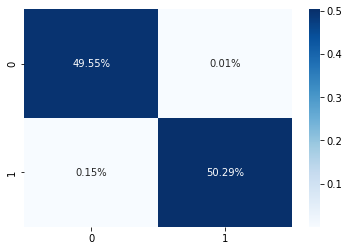

In [ ]:
cm = confusion_matrix(y_cv, y_cv_pred)
print_confusion_matrix(y_cv,y_cv_pred)
print("ACCURACY SCORE-->",accuracy_score(y_cv, y_cv_pred))
sn.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print(classification_report(y_cv,y_cv_pred))

## Observations:


1.   The cross validation accuracy for logistic regression is 95.1%
2.   The cross validation accuracy for Decision Tree is 99.7%
3.   The cross validation accuracy for logistic regression is 99.8%
4.   Precision, Recall and F1 Score is almost perfect for both Decision Tree and Random Forest.
5.   As, Decision Tree and Random Forest performs almost similar, we will use Decision Tree as our final model, because of **less complexity and better interpretability**.


#2. Training Decision Tree 

As mentioned above, we have selected Decision Tree as our model of choice. So,we will use the whole of the training data inorder to train our model and then used that to predict the test data set outcomes.

In [ ]:
#reading the csv files
train_data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/FINAL_TRAINING_DATA_NAN_ENCODING.csv',sep=";")
test_data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/FINAL_TEST_DATA_NAN_ENCODING.csv',sep=";")

In [ ]:
#Extracting the train and test data
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1.0: 32660, 0.0: 151})
Counter({1.0: 3621, 0.0: 25})


Oversampling using SMOTE
* as the data is highly imbalanced.




In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({1.0: 32660, 0.0: 32660})
The number of classes after fit Counter({1.0: 32660, 0.0: 32660})


## 2.1 Training Phase


In [ ]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

### 2.2 Predicting test data

True positive =  24
False positive =  1
False negative =  12
True negative =  3609
ACCURACY SCORE--> 0.996434448710916
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79        25
         1.0       1.00      1.00      1.00      3621

    accuracy                           1.00      3646
   macro avg       0.83      0.98      0.89      3646
weighted avg       1.00      1.00      1.00      3646



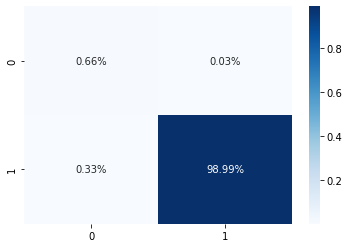

In [ ]:
y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print_confusion_matrix(y_test, y_test_pred)
print("ACCURACY SCORE-->",accuracy_score(y_test, y_test_pred))
sn.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print(classification_report(y_test, y_test_pred))

## 2.3 Saving the Model for future references

In [ ]:
import pickle
filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/finalized_model_DT.sav'
pickle.dump(clf, open(filename, 'wb'))